# Alphabet Sign Language Detection Project - Advance Machine Learning

Team: Jyothsna, Ramya, Venkat, Pranay

### Step 1: Import all required packages identified in the initial phase of the project

In [ ]:
#Google colab tensor flow version is 2.13. So, older version is installed
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [ ]:
print("Please review output to identify any issues with the import packages")

# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Import packages successfully.")

Please review output to identify any issues with the import packages
Import packages successfully.


### Step 2: Set Directory path for accessing Images for each alphabet

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Set folderpath in google drive to check all available subfolders created for each english alphabet(A-Z)
folder_path = '/content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/'

# Print the list of subfolders for confirmation
for entry in os.scandir(folder_path):
    if entry.is_dir():
        print("Directory:", entry.path)

Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/T
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/V
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/S
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/Y
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/W
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/U
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/Q
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/X
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/Z
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/R
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/J
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/I
Directory: /content/drive/MyDrive/AML_Alphabet_Sign_Language_Ima

### Importing the dataset from Google Drive directory: AML_Alphabet_Sign_Language_Images

In [ ]:
batch_size = 64
imageSize = 120
target_dims = (imageSize, imageSize, 3)
num_classes = 26

train_len = 12974
train_dir = '/content/drive/MyDrive/AML_Alphabet_Sign_Language_Images/Dataset/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [ ]:
X_train.shape

(12974, 120, 120, 3)

In [ ]:
y_train.shape

(12974,)

In [ ]:
X_train[0].shape

(120, 120, 3)

Visualizing the images.

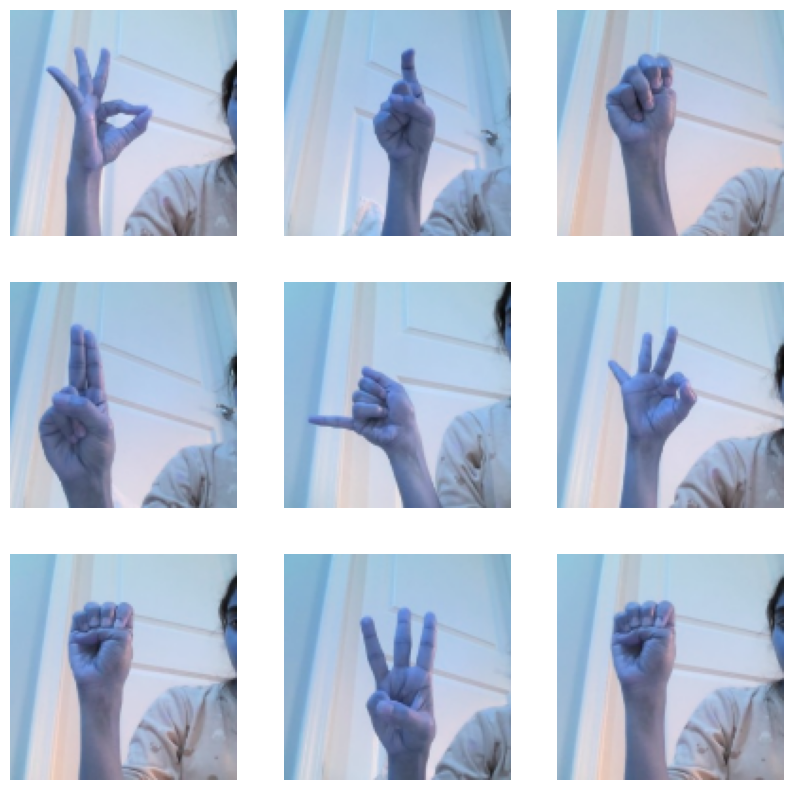

In [ ]:

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = X_train[i]

    if img.dtype != 'uint8':
        img = (img * 255).astype('uint8')

    plt.imshow(img)
    plt.axis("off")

plt.show()

### Data Exploration or any thing else before splitting data

### Split the dataset for train and test

In [ ]:
# Copy to temporary variable for train and test split
X_data = X_train
y_data = y_train

#train_test_split package helps in splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=42,stratify=y_data)

In [ ]:
import numpy as np
unique_classes, class_counts = np.unique(y_data, return_counts=True)
print("Class distribution:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} instances")

Class distribution:
Class 0: 350 instances
Class 1: 349 instances
Class 2: 349 instances
Class 3: 349 instances
Class 4: 349 instances
Class 5: 349 instances
Class 6: 349 instances
Class 7: 349 instances
Class 8: 350 instances
Class 9: 350 instances
Class 10: 349 instances
Class 11: 350 instances
Class 12: 349 instances
Class 13: 350 instances
Class 14: 349 instances
Class 15: 349 instances
Class 16: 350 instances
Class 17: 349 instances
Class 18: 349 instances
Class 19: 349 instances
Class 20: 349 instances
Class 21: 349 instances
Class 22: 349 instances
Class 23: 349 instances
Class 24: 350 instances
Class 25: 349 instances


### One hot encoding to convert the images to numerical

In [ ]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=26)
y_cat_test = to_categorical(y_test,num_classes=26)
print("One Hot Encoding completed successfully")

One Hot Encoding completed successfully


In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(7264, 120, 120, 3)
(7264,)
(1817, 120, 120, 3)
(1817,)
(7264, 26)
(1817, 26)


In [ ]:
# Remove X-data and Y_data to save CPU and space!
#import gc
#del X_data
#del y_data
#gc.collect()

### Import packages for Model building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

### Model 1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Added a dropout layer for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(26, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 activation (Activation)     (None, 118, 118, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 57, 57, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=10,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
142/142 - 25s - loss: 2.5830 - accuracy: 0.1864 - val_loss: 0.8456 - val_accuracy: 0.7077 - 25s/epoch - 174ms/step
Epoch 2/10
142/142 - 4s - loss: 0.7241 - accuracy: 0.7250 - val_loss: 0.2056 - val_accuracy: 0.9255 - 4s/epoch - 25ms/step
Epoch 3/10
142/142 - 3s - loss: 0.3493 - accuracy: 0.8694 - val_loss: 0.0906 - val_accuracy: 0.9640 - 3s/epoch - 25ms/step
Epoch 4/10
142/142 - 3s - loss: 0.2032 - accuracy: 0.9204 - val_loss: 0.0826 - val_accuracy: 0.9735 - 3s/epoch - 23ms/step
Epoch 5/10
142/142 - 3s - loss: 0.1428 - accuracy: 0.9462 - val_loss: 0.0353 - val_accuracy: 0.9920 - 3s/epoch - 22ms/step
Epoch 6/10
142/142 - 3s - loss: 0.1112 - accuracy: 0.9580 - val_loss: 0.0263 - val_accuracy: 0.9918 - 3s/epoch - 23ms/step
Epoch 7/10
142/142 - 4s - loss: 0.0920 - accuracy: 0.9673 - val_loss: 0.0099 - val_accuracy: 0.9969 - 4s/epoch - 30ms/step
Epoch 8/10
142/142 - 3s - loss: 0.0747 - accuracy: 0.9753 - val_loss: 0.0240 - val_accuracy: 0.9951 - 3s/epoch - 23ms/step
Epoch 9/10
14

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,2.583015,0.186433,0.845560,0.707680
1,0.724052,0.725030,0.205565,0.925507
2,0.349254,0.869398,0.090564,0.964038
3,0.203234,0.920383,0.082564,0.973542
4,0.142754,0.946151,0.035294,0.992037
5,0.111194,0.958044,0.026260,0.991780
6,0.092045,0.967294,0.009879,0.996918
7,0.074697,0.975333,0.024033,0.995119
8,0.062571,0.978417,0.001753,0.999743
9,0.042584,0.986125,0.001997,0.999743


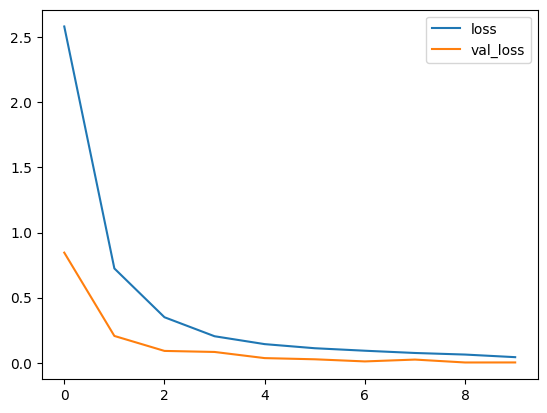

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

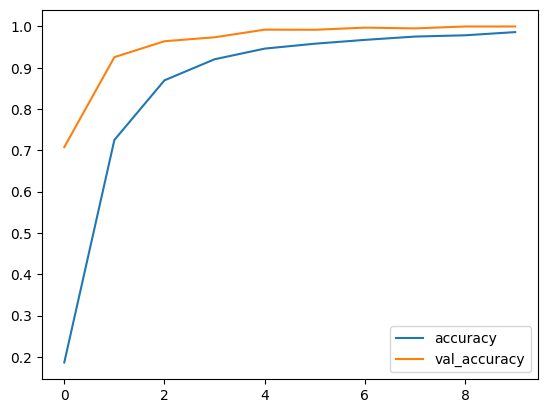

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.0019969989079982042, 0.9997431039810181]

In [ ]:
#predictions = model.predict_classes(X_test)
predictions= tf.argmax(model.predict(X_test), axis=-1).numpy()
print("Predictions Output x_test")

57/57 [==============================] - 0s 5ms/step
Predictions Output x_test


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00       150
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00       150
           8       1.00      1.00      1.00       149
           9       1.00      1.00      1.00       149
          10       1.00      1.00      1.00       150
          11       1.00      1.00      1.00       149
          12       1.00      0.99      1.00       150
          13       0.99      1.00      1.00       149
          14       1.00      1.00      1.00       150
          15       1.00      1.00      1.00       150
          16       1.00      1.00      1.00       149
          17       1.00    

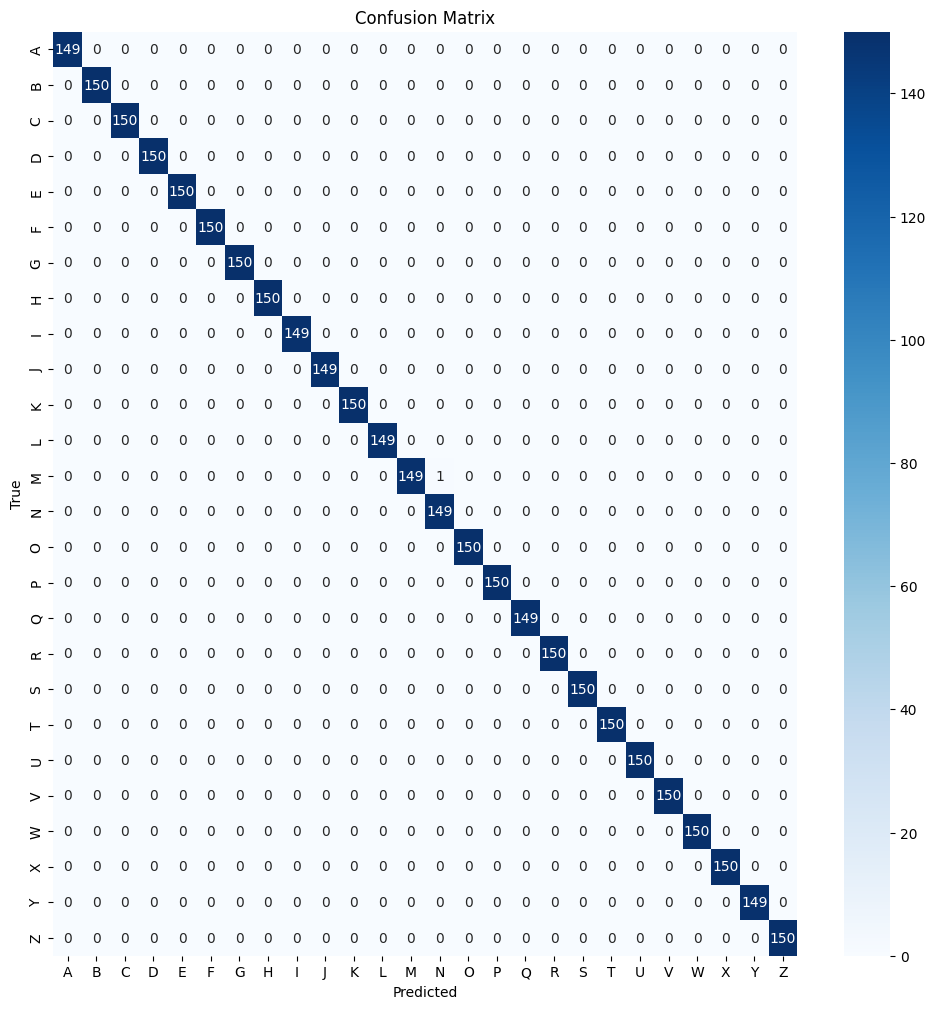

In [ ]:
#plotting the heatmap to see how well each of  the classes are detected correctly.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Model-2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
#Data augmentation is performed using the ImageDataGenerator.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(8, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Fully connected layers with regularization and batch normalization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(26, activation='softmax'))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Adding callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)
]

# Train the model with the augmented data
history = model.fit(datagen.flow(X_train, y_cat_train, batch_size=64),
                    steps_per_epoch=len(X_train) // 64,
                    epochs=30,
                    validation_data=(X_test, y_cat_test),
                    callbacks=callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 116, 116, 8)       608       
                                                                 
 activation_4 (Activation)   (None, 116, 116, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 58, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 16)        1168      
                                                                 
 activation_5 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                  

In [ ]:
metrics = pd.DataFrame(history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy,lr
0,3.261060,0.154597,4.437903,0.072181,0.001000
1,2.301719,0.337695,4.677823,0.120730,0.001000
2,1.835990,0.463347,3.695229,0.227074,0.001000
3,1.516847,0.561939,2.273499,0.399692,0.001000
4,1.355509,0.605523,3.838311,0.132546,0.001000
5,1.176846,0.659865,8.139238,0.135114,0.001000
6,1.099066,0.686259,9.967249,0.187002,0.001000
7,0.954124,0.737829,1.473153,0.456203,0.000100
8,0.919577,0.756127,0.747981,0.790907,0.000100
9,0.878663,0.770766,0.473466,0.934755,0.000100


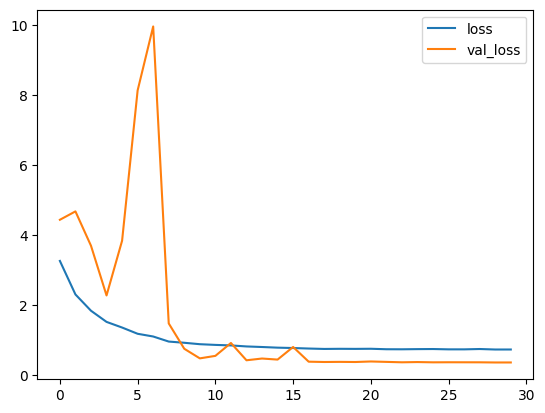

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

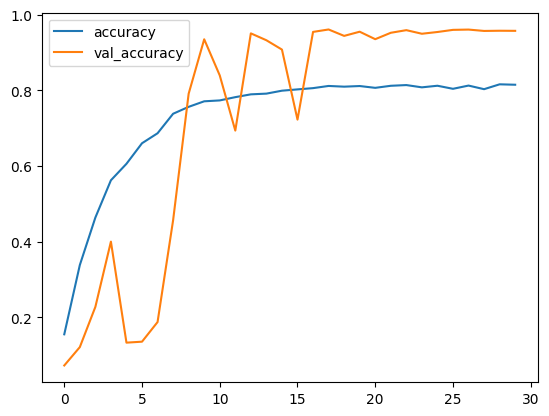

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.35626187920570374, 0.9571024775505066]

In [ ]:
predictions= tf.argmax(model.predict(X_test), axis=-1).numpy()
print("Predictions Output x_test")

122/122 [==============================] - 1s 6ms/step
Predictions Output x_test


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       149
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150
           3       0.99      1.00      1.00       150
           4       1.00      1.00      1.00       150
           5       1.00      0.97      0.99       150
           6       1.00      1.00      1.00       150
           7       1.00      0.97      0.98       150
           8       0.94      0.92      0.93       149
           9       1.00      0.97      0.98       149
          10       1.00      0.94      0.97       150
          11       0.97      1.00      0.99       149
          12       0.95      1.00      0.97       150
          13       0.91      1.00      0.95       149
          14       0.95      0.93      0.94       150
          15       0.99      1.00      0.99       150
          16       1.00      0.99      0.99       149
          17       0.93    

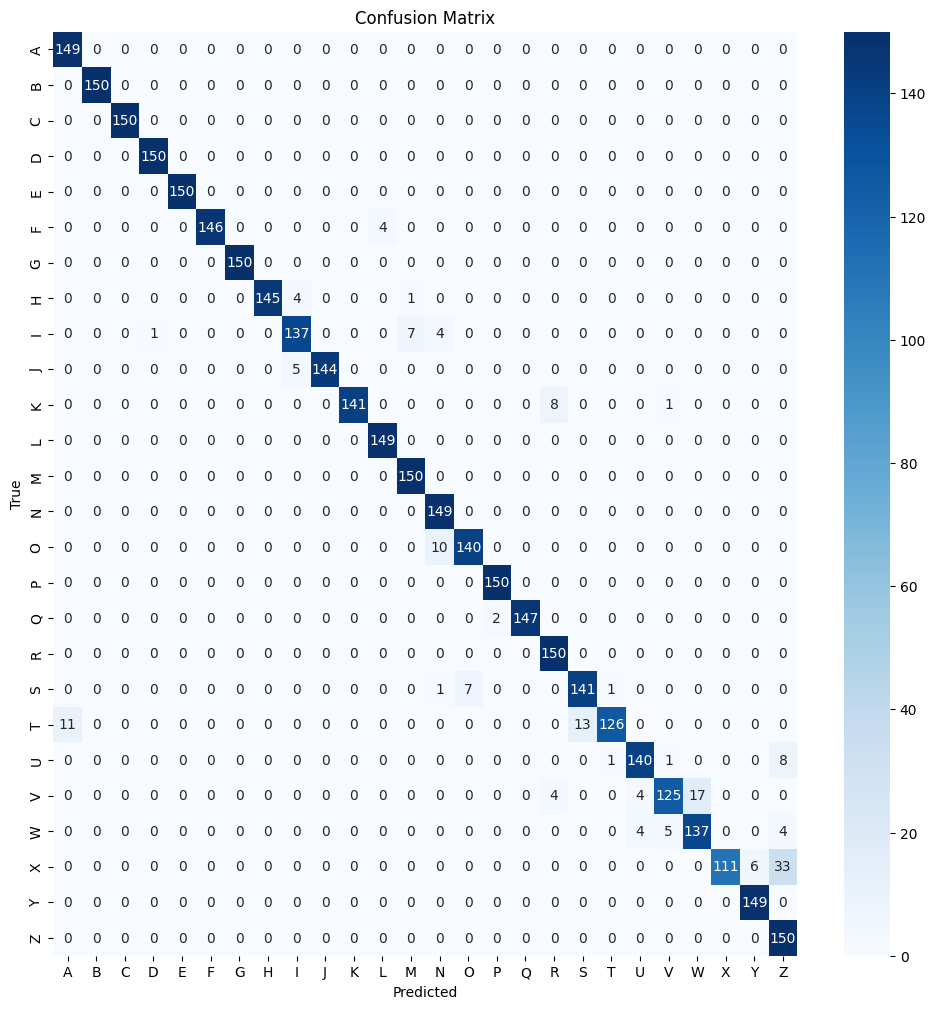

In [ ]:
#plotting the heatmap to see how well each of  the classes are detected correctly.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Model 3 - using ResNET

In [ ]:
from keras.applications import ResNet101V2

# Load pre-trained ResNet101V2 model without the top (fully connected) layers
base_model = ResNet101V2(weights='imagenet',pooling='avg',classes=26, include_top=False, input_shape=(120, 120, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model2 = Sequential()

# Add the ResNet101V2 base model
model2.add(base_model)

# Add custom layers on top of the ResNet101V2 base model
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dense(26, activation='softmax'))
model2.summary()

171317808/171317808 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                32784     
                                                                 
 dense_4 (Dense)             (None, 26)                442       
                                                                 
Total params: 42659786 (162.73 MB)
Trainable params: 33226 (129.79 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_cat_train,
          epochs=9,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/9
121/121 - 323s - loss: 1.4008 - accuracy: 0.6332 - val_loss: 0.3273 - val_accuracy: 0.9607 - 323s/epoch - 3s/step
Epoch 2/9
121/121 - 364s - loss: 0.1607 - accuracy: 0.9855 - val_loss: 0.0851 - val_accuracy: 0.9937 - 364s/epoch - 3s/step
Epoch 3/9
121/121 - 367s - loss: 0.0552 - accuracy: 0.9970 - val_loss: 0.0411 - val_accuracy: 0.9973 - 367s/epoch - 3s/step
Epoch 4/9
121/121 - 320s - loss: 0.0286 - accuracy: 0.9994 - val_loss: 0.0265 - val_accuracy: 0.9979 - 320s/epoch - 3s/step
Epoch 5/9
121/121 - 365s - loss: 0.0181 - accuracy: 0.9999 - val_loss: 0.0180 - val_accuracy: 0.9994 - 365s/epoch - 3s/step
Epoch 6/9
121/121 - 365s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9988 - 365s/epoch - 3s/step
Epoch 7/9
121/121 - 319s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9997 - 319s/epoch - 3s/step
Epoch 8/9
121/121 - 318s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9988 - 318s/epoch - 3s/step
Epoch 9/

In [ ]:
metrics = pd.DataFrame(model2.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.400847,0.633230,0.327334,0.960701
1,0.160694,0.985485,0.085145,0.993652
2,0.055193,0.997019,0.041140,0.997279
3,0.028618,0.999352,0.026485,0.997884
4,0.018135,0.999870,0.017967,0.999395
5,0.012222,1.000000,0.014948,0.998791
6,0.008919,1.000000,0.010841,0.999698
7,0.006817,1.000000,0.009466,0.998791
8,0.005367,1.000000,0.007430,0.999698


In [ ]:
model2.evaluate(X_test,y_cat_test,verbose=0)

[0.007429858669638634, 0.9996976852416992]

In [ ]:
#predictions = model.predict_classes(X_test)
predictions= tf.argmax(model2.predict(X_test), axis=-1).numpy()
print("Predictions Output x_test")
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

104/104 [==============================] - 96s 908ms/step
Predictions Output x_test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       128
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       127
          10       1.00      0.99      1.00       128
          11       1.00      1.00      1.00       127
          12       1.00      1.00      1.00       127
          13       1.00      1.00      1.00       127
          14       1.00      1.00      1.00       128
          15       1.00      1.00      1.00       1

In [ ]:
# Save the model
model2.save("resnet101v2_sign_language.h5")

# # You can load the saved model later if needed
# loaded_model = load_model("your_model_name.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# ResNet101V2 seems to be doing a lot better than the convnet layers. Lets use this model to see how it performs on the unseen data yet.

In [ ]:
model2.evaluate(X_final_test,y_cat_final_test,verbose=0)

[0.007282941602170467, 1.0]